In [80]:
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [81]:
mnist

<module 'tensorflow.python.keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Counselor\\.conda\\envs\\py3-TF2.0\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [82]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [83]:
X_train.shape

(60000, 28, 28)

In [84]:
X_train, X_test = X_train/255.0, X_test/255.0

In [85]:
X_train.shape

(60000, 28, 28)

In [86]:
num_train_sample = int(0.9*60000)
num_validation_sample = int(0.1*60000)
num_train_sample

54000

In [87]:
X_train_data = X_train[:num_train_sample]
X_train_data.shape

(54000, 28, 28)

In [88]:
X_train.shape

(60000, 28, 28)

In [89]:
y_train_data = y_train[:num_train_sample]
y_train_data.shape

(54000,)

In [90]:
validation_data = X_train[num_train_sample:num_train_sample+num_validation_sample]

In [91]:
validation_data.shape

(6000, 28, 28)

In [93]:
validation_targets = y_train[num_train_sample:num_train_sample+num_validation_sample]

In [94]:
validation_targets.shape

(6000,)

In [95]:
28*28

784

In [102]:
input_size = 784
output_size = 10
hidden_layer_size = 50
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(output_size,activation='softmax'),
                            ])

In [103]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [113]:
batch_size = 500
NUM_EPOCHS = 10
early_stopping = tf.keras.callbacks.EarlyStopping()
model.fit(train_data,y_train_data, epochs=NUM_EPOCHS,validation_data=(validation_data,validation_targets),
          callbacks=[early_stopping], verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 - 5s - loss: 0.0856 - accuracy: 0.9760 - val_loss: 2.5582 - val_accuracy: 0.1077
Epoch 2/10
54000/54000 - 4s - loss: 0.0793 - accuracy: 0.9770 - val_loss: 2.5774 - val_accuracy: 0.1273


In [114]:
test_loss, test_accuracy = model.evaluate(test_data,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [116]:
print('Test Loss: {0:2f}, Test Accuracy: {1:2f}%'.format(test_loss,test_accuracy*100.))

Test Loss: 0.313534, Test Accuracy: 95.220000%


In [117]:
model.predict_classes(test_data)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [118]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

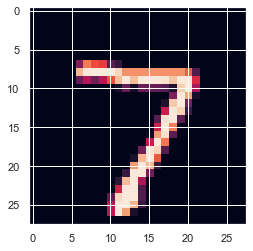

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.imshow(test_data[0])